In [2]:
import xgboost as xgb
import numpy as np
from sklearn.cross_validation import KFold, train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.grid_search import GridSearchCV
import pandas as pd

import warnings #エラーを防ぐ
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [3]:
train_df6 =pd.read_csv("train.csv", header=0)
test_df6 =pd.read_csv("test.csv", header=0)
test_df6.tail()

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
413,1,0.377084,0,0,8.0500,0,0,1,0,0,1
414,0,0.486409,0,0,108.9000,1,0,0,1,0,0
415,1,0.480145,0,0,7.2500,0,0,1,0,0,1
416,1,0.377084,0,0,8.0500,0,0,1,0,0,1
417,1,0.377084,1,1,22.3583,0,0,1,1,0,0


In [9]:
# 学習データと評価データに分ける
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

def split_valid_test_data(data, fraction=(0.2)):
    #目的変数を抽出
    data_y = data["Survived"]
    lb = LabelBinarizer()
    data_y = lb.fit_transform(data_y)#arrayにしている
    
    #目的変数を消す
    data_x = data.drop(["Survived"], axis=1)
    
    #pandasで分ける
    train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=fraction)

    return train_x.values, train_y, valid_x.values, valid_y

train_x, train_y, valid_x, valid_y = split_valid_test_data(train_df6)
print("train_x:{}".format(train_x.shape))
print("train_y:{}".format(train_y.shape))
print("valid_x:{}".format(valid_x.shape))
print("valid_y:{}".format(valid_y.shape))
train_y = train_y.T[0]
valid_y = valid_y.T[0]

train_x:(712, 11)
train_y:(712, 1)
valid_x:(179, 11)
valid_y:(179, 1)


In [10]:
params={"objective": "binary:logistic", 
        "eval_metric": "error",
        #"num_class": 3, 
        
        #"eta": 0.3, 
        #'n_estimators': 100,
        
        
        #"max_depth": 6, 
        #"gamma": 0,
        #"min_child_weight": 1, 
        #"subsample": 1, 
        #"colsample_bytree": 1,
    
        #"reg_lambda":, 
        #"reg_alpha":
        }


xgb_model = xgb.XGBClassifier(**params)
class_cv = GridSearchCV(xgb_model,
                   {'learning_rate': [0.05,0.1,0.15,0.20,0.25,0.3],
                    'n_estimators': [50,100,200]
                   },verbose = 1)
class_cv.fit(train_x,train_y)
print(class_cv.best_score_)#評価関数でのスコア、通常は正答率に該当
print(class_cv.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
0.7991573033707865
{'n_estimators': 50, 'learning_rate': 0.05}


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.5s finished


In [82]:
params={"objective": "binary:logistic", 
        "eval_metric": "error",
        #"num_class": 3, 
        
        "eta": 0.05, 
        'n_estimators': 50,
        
        
        #"max_depth": 6, 
        #"gamma": 0,
        #"min_child_weight": 1, 
        #"subsample": 1, 
        #"colsample_bytree": 1,
    
        #"reg_lambda":, 
        #"reg_alpha":
        }

xgb_model = xgb.XGBClassifier(**params)
class_cv = GridSearchCV(xgb_model,
                   {"max_depth": [2,4,6,8,10],
                    'min_child_weight': [1,3,5,7],
                    'gamma':[0.1,0.2,0.3,0.4,0.5,0.6]
                   },verbose = 1)
class_cv.fit(train_x,train_y)
print(class_cv.best_score_)#評価関数でのスコア、通常は正答率に該当
print(class_cv.best_params_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
0.8328651685393258
{'max_depth': 8, 'gamma': 0.4, 'min_child_weight': 5}


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    7.4s finished


In [85]:
params={"objective": "binary:logistic", 
        "eval_metric": "error",
        #"num_class": 3, 
        
        "eta": 0.05, 
        'n_estimators': 50,
        
        
        "max_depth": 8, 
        "gamma": 0.4,
        "min_child_weight": 5, 
        
        #"subsample": 1, 
        #"colsample_bytree": 1,
    
        #"reg_lambda":, 
        #"reg_alpha":
        }

xgb_model = xgb.XGBClassifier(**params)
class_cv = GridSearchCV(xgb_model,
                   {'subsample':[0.5,0.6,0.7,0.8,0.9,1.0],
                    'colsample_bytree':[0.5,0.6,0.7,0.8,0.9,1.0]
                   },verbose = 1)
class_cv.fit(train_x,train_y)
print(class_cv.best_score_)#評価関数でのスコア、通常は正答率に該当
print(class_cv.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
0.8328651685393258
{'colsample_bytree': 1.0, 'subsample': 1.0}


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    2.1s finished


In [88]:
params={"objective": "binary:logistic", 
        "eval_metric": "error",
        #"num_class": 3, 
        
        "eta": 0.05, 
        'n_estimators': 50,
        
        
        "max_depth": 8, 
        "gamma": 0.4,
        "min_child_weight": 5, 
        
        "subsample": 1, 
        "colsample_bytree": 1,
    
        #"reg_lambda":, 
        #"reg_alpha":
        }

xgb_model = xgb.XGBClassifier(**params)
class_cv = GridSearchCV(xgb_model,
                   {
                     'learning_rate': [0.05,0.1,0.15,0.20,0.25,0.3]
                   },verbose = 1)
class_cv.fit(train_x,train_y)
print(class_cv.best_score_)#評価関数でのスコア、通常は正答率に該当
print(class_cv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
0.8328651685393258
{'learning_rate': 0.1}


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.4s finished


In [31]:
params={"objective": "binary:logistic", 
        "eval_metric": "error",
        #"num_class": 3, 
        
        "eta": 0.05, 
        'n_estimators': 50,
        
        
        "max_depth": 8, 
        "gamma": 0.4,
        "min_child_weight": 5, 
        
        "subsample": 1, 
        "colsample_bytree": 1,
    
        #"reg_lambda":, 
        #"reg_alpha":
        }

clf_class = xgb.XGBClassifier(**params)

clf_class.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.05, eval_metric='error', gamma=0.4,
       learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=5, missing=None, n_estimators=50, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [140]:
pred_train = clf_class.predict(train_x)
pred_valid = clf_class.predict(valid_x)
train_score = sum(pred_train== train_y)/len(train_y)
valid_score  = sum(pred_valid== valid_y)/len(valid_y)

train_score,valid_score

(0.8806179775280899, 0.8491620111731844)

In [141]:
pred_valid = clf_class.predict(test_df6.values)
pred_valid

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [143]:
submission =pd.read_csv("id.csv", header=0)
submission["Survived"] = pred_valid
submission.to_csv("submission_xgboost.csv",index=False)
submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


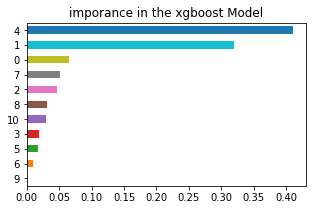

In [33]:
# feature importance のプロット
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
importances = pd.Series(clf_class.feature_importances_)
importances = importances.sort_values()
importances.plot(kind = "barh")
plt.title("imporance in the xgboost Model")
plt.show()

# 結果
- チケットの値段
- 年齢
- 性別

# おまけ：ランダムフォレスト

In [28]:
# http://d.hatena.ne.jp/shakezo/20121221/1356089207
#木の本数かね
# n_jobs=2 -> CPU コアを2つ使用して並列処理
# n_estimators=10 -> 10個の決定木からランダムフォレストをトレーニング
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000,random_state=1, n_jobs=4)


forest.fit(train_x, train_y)


# 識別率を確認
predicted = forest.predict(valid_x)
sum(predicted == valid_y) / len(valid_y)


0.88268156424581

In [29]:
predicted = forest.predict(test_df6.values)
submission =pd.read_csv("id.csv", header=0)
submission["Survived"] = predicted
submission.to_csv("submission_rf.csv",index=False)
submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1
